In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.warnings.filterwarnings("ignore")
%matplotlib qt

In [35]:
N_iterations = 20
x_i, y_i = 0, 0
density_per_unit = 512
def get_c_matrix(x_min, y_min, x_max, y_max, pix_density):
    re = np.linspace(x_min, x_max, pix_density)
    im = np.linspace(y_min, y_max, pix_density)
    return re[np.newaxis,:] + im[:,np.newaxis] *1j

def in_mandelbrot(c, N_iterations=20):
    z= 0
    for i in range(N_iterations):
        z = z**2 + c
        if abs(z)>2:
            return i
    return threshold-1
c = get_c_matrix(-2,-2,2,2,512)
print(c)

[[-2.        -2.j         -1.99217221-2.j         -1.98434442-2.j
  ...  1.98434442-2.j          1.99217221-2.j
   2.        -2.j        ]
 [-2.        -1.99217221j -1.99217221-1.99217221j -1.98434442-1.99217221j
  ...  1.98434442-1.99217221j  1.99217221-1.99217221j
   2.        -1.99217221j]
 [-2.        -1.98434442j -1.99217221-1.98434442j -1.98434442-1.98434442j
  ...  1.98434442-1.98434442j  1.99217221-1.98434442j
   2.        -1.98434442j]
 ...
 [-2.        +1.98434442j -1.99217221+1.98434442j -1.98434442+1.98434442j
  ...  1.98434442+1.98434442j  1.99217221+1.98434442j
   2.        +1.98434442j]
 [-2.        +1.99217221j -1.99217221+1.99217221j -1.98434442+1.99217221j
  ...  1.98434442+1.99217221j  1.99217221+1.99217221j
   2.        +1.99217221j]
 [-2.        +2.j         -1.99217221+2.j         -1.98434442+2.j
  ...  1.98434442+2.j          1.99217221+2.j
   2.        +2.j        ]]


In [31]:
X = in_mandelbrot(c)
print(X)
plt.imshow(X, interpolation="bicubic", cmap='binary')
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

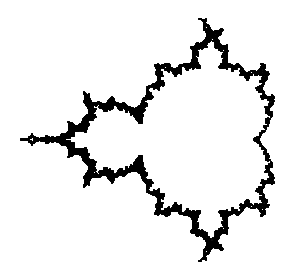

In [11]:
def get_members(c, num_iterations):
    mask = in_mandelbrot(c, num_iterations)
    return c[mask]
c = get_c_matrix(-2,-2,2,2,512)
members = get_members(c, num_iterations=20)

plt.scatter(members.real, members.imag, color="black", marker=",", s=1)
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
def mandelbrot(x, y, threshold):
    c = complex(x, y)
    z = complex(0, 0)
    for i in range(threshold):
        z = z**2 + z + c
        if abs(z) > 2.:
            return i
    return threshold - 1

x_start, y_start = -1, 0  # an interesting region starts here
width, height = 3, 1  # for 3 units up and right
density_per_unit = 400  # how many pixles per unit

# real and imaginary axis
re = np.linspace(x_start - width/2, x_start + width/2, width * density_per_unit )
im = np.linspace(y_start - width/2, y_start + width/2, width * density_per_unit)

fig = plt.figure(figsize=(10, 10))  # instantiate a figure to draw
ax = plt.axes()  # create an axes object
    
X = np.empty((len(re), len(im)))

threshold = 70
for i in range(len(re)):
    for j in range(len(im)):
        X[i, j] = mandelbrot(re[i], im[j], threshold)
        
img = ax.imshow(X, interpolation="bicubic", cmap='plasma')

: 